In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns',40)

# 1. Read passengers data, then combine into one dataframe

In [3]:
p_18 = pd.read_csv('p_2018.csv')
p_19 = pd.read_csv('p_2019.csv')

In [4]:
p_18 = p_18.drop(columns =['Unnamed: 0'])
p_19 = p_19.drop(columns =['Unnamed: 0'])

In [5]:
df_pass = pd.concat([p_18,p_19])

In [6]:
df_pass = df_pass.reset_index()
df_pass = df_pass.drop(columns = ['index'])

In [7]:
df_pass

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,unique_carrier,airline_id,unique_carrier_name,region,carrier,carrier_name,carrier_group,carrier_group_new,origin_airport_id,origin_city_market_id,origin,origin_city_name,origin_country,origin_country_name,dest_airport_id,dest_city_market_id,dest,dest_city_name,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0.0,1.0,2360.0,9.0,7.0,12.0,0.0,86.0,55.0,50.0,KAH,20272,Kenmore Air Harbor,D,KAH,Kenmore Air Harbor,1,6,10559,30559,BFI,"Seattle, WA",US,United States,11588,31588,ESD,"Eastsound, WA",US,United States,4,416,1,2018,1,1,L,DU
1,0.0,1.0,2379.0,9.0,0.0,0.0,0.0,84.0,35.0,30.0,KAH,20272,Kenmore Air Harbor,D,KAH,Kenmore Air Harbor,1,6,10559,30559,BFI,"Seattle, WA",US,United States,14477,34477,RCE,"Roche Harbor, WA",US,United States,4,416,1,2018,1,1,L,DU
2,0.0,1.0,2446.0,9.0,3.0,0.0,0.0,128.0,50.0,45.0,KAH,20272,Kenmore Air Harbor,D,KAH,Kenmore Air Harbor,1,6,10559,30559,BFI,"Seattle, WA",US,United States,16016,36016,YCD,"Nanaimo, Canada",CA,Canada,4,416,1,2018,1,1,L,IU
3,0.0,1.0,1567.0,6.0,3.0,0.0,0.0,69.0,45.0,40.0,KAH,20272,Kenmore Air Harbor,D,KAH,Kenmore Air Harbor,1,6,10844,30844,BYW,"Blakely Island, WA",US,United States,13002,30559,LKE,"Seattle, WA",US,United States,0,40,4,2018,1,1,L,DU
4,0.0,1.0,2360.0,9.0,0.0,0.0,0.0,86.0,55.0,50.0,KAH,20272,Kenmore Air Harbor,D,KAH,Kenmore Air Harbor,1,6,11588,31588,ESD,"Eastsound, WA",US,United States,10559,30559,BFI,"Seattle, WA",US,United States,4,416,1,2018,1,1,L,DU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961566,518.0,502.0,17369200.0,71786.0,45439.0,54157.0,0.0,239.0,32207.0,22701.0,WN,19393,Southwest Airlines Co.,D,WN,Southwest Airlines Co.,3,3,11259,30194,DAL,"Dallas, TX",US,United States,12191,31453,HOU,"Houston, TX",US,United States,6,612,1,2019,1,1,F,DU
961567,519.0,519.0,830400.0,4152.0,2060.0,390.0,0.0,17.0,8304.0,6228.0,NEW,20273,New England Airlines Inc.,D,NEW,New England Airlines Inc.,1,6,10613,30613,BID,"Block Island, RI",US,United States,15855,35855,WST,"Westerly, RI",US,United States,1,131,1,2019,9,1,F,DU
961568,520.0,260.0,468000.0,2340.0,1709.0,0.0,0.0,94.0,11388.0,9204.0,9K,20253,Cape Air,D,9K,Cape Air,1,6,14843,34819,SJU,"San Juan, PR",US,United States,15027,34992,STX,"Christiansted, VI",US,United States,1,125,1,2019,8,1,F,DU
961569,521.0,520.0,16431300.0,66560.0,47964.0,232966.0,0.0,163.0,24411.0,14693.0,HA,19690,Hawaiian Airlines Inc.,D,HA,Hawaiian Airlines Inc.,3,3,12173,32134,HNL,"Honolulu, HI",US,United States,12758,32758,KOA,"Kona, HI",US,United States,6,608,1,2019,1,1,F,DU


# 2. Filter for domestic flights in US

In [8]:
df_pass = df_pass[df_pass.origin_country_name == 'United States']
df_pass = df_pass[df_pass.dest_country_name == 'United States']

In [9]:
df_pass = df_pass.reset_index()

In [10]:
df_pass = df_pass.drop(columns = ['index'])

# 3. Dropping of unncessary columns

In [11]:
df_pass = df_pass.drop(columns = ['departures_scheduled','departures_performed','freight','mail','airline_id',
                                  'unique_carrier_name','region','carrier',
                                  'carrier_name','carrier_group','carrier_group_new',
                                  'origin_city_market_id','origin_city_name',
                                  'origin_country','origin_country_name',
                                  'dest_city_market_id','dest_city_name','dest_country',
                                  'dest_country_name','aircraft_type','distance_group',
                                  'class','data_source'])

In [12]:
df_pass

,payload,seats,passengers,distance,ramp_to_ramp,air_time,unique_carrier,origin_airport_id,origin,dest_airport_id,dest,aircraft_group,aircraft_config,year,month
0,2360.0,9.0,7.0,86.0,55.0,50.0,KAH,10559,BFI,11588,ESD,4,1,2018,1
1,2379.0,9.0,0.0,84.0,35.0,30.0,KAH,10559,BFI,14477,RCE,4,1,2018,1
2,1567.0,6.0,3.0,69.0,45.0,40.0,KAH,10844,BYW,13002,LKE,0,4,2018,1
3,2360.0,9.0,0.0,86.0,55.0,50.0,KAH,11588,ESD,10559,BFI,4,1,2018,1
4,1502.0,6.0,0.0,64.0,40.0,35.0,KAH,11646,FBS,12652,KEH,0,4,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775424,17369200.0,71786.0,45439.0,239.0,32207.0,22701.0,WN,11259,DAL,12191,HOU,6,1,2019,1
775425,830400.0,4152.0,2060.0,17.0,8304.0,6228.0,NEW,10613,BID,15855,WST,1,1,2019,9
775426,468000.0,2340.0,1709.0,94.0,11388.0,9204.0,9K,14843,SJU,15027,STX,1,1,2019,8
775427,16431300.0,66560.0,47964.0,163.0,24411.0,14693.0,HA,12173,HNL,12758,KOA,6,1,2019,1


# 4. Feature engineering

### ***Feature:*** percent_dep_performed - commented out code blocks - not creating this feature anymore


In [13]:
#df_pass['percent_dep_performed'] = df_pass['departures_performed']/df_pass['departures_scheduled']

In [14]:
#df_pass = df_pass.drop(columns = ['departures_performed','departures_scheduled'])

In [15]:
#df_pass.percent_dep_performed.value_counts()

In [16]:
# Replacing infinite with nan
#df_pass.percent_dep_performed = df_pass.percent_dep_performed.replace(np.inf, np.nan, inplace=False)
#df_pass.percent_dep_performed = df_pass.percent_dep_performed.replace(0.0, np.nan, inplace=False)
# Dropping all the rows with nan values
#df_pass.percent_dep_performed  = df_pass.percent_dep_performed.dropna()
  
# Printing df
#df_pass.percent_dep_performed.describe()

### ***Feature 1:*** percent_capacity of flight using seats and passengeres

In [17]:
df_pass['passengers'].value_counts()

0.0        141613
2.0         10116
1.0          9469
3.0          7119
4.0          6344
            ...  
18273.0         1
73081.0         1
18267.0         1
18261.0         1
16663.0         1
Name: passengers, Length: 25265, dtype: int64

In [18]:
df_pass['passengers'] = df_pass['passengers'].dropna()
df_pass['seats'] = df_pass['seats'].dropna()


In [19]:
df_pass['seats'] = df_pass['passengers']/df_pass['seats']

In [20]:
df_pass = df_pass.rename(columns={'seats':'percent_capacity'})

In [21]:
# Replacing infinite with nan
df_pass.percent_capacity = df_pass.percent_capacity.replace(np.inf, np.nan, inplace=False)
df_pass.percent_capacity = df_pass.percent_capacity.replace(0.0, np.nan, inplace=False)
# Dropping all the rows with nan values
df_pass.percent_capacity  = df_pass.percent_capacity.dropna()
  
# Printing df
df_pass.percent_capacity.describe()

count    633804.000000
mean          0.738872
std           0.217699
min           0.002128
25%           0.660000
50%           0.811594
75%           0.892857
max           1.543750
Name: percent_capacity, dtype: float64

In [22]:
df_pass = df_pass.dropna()

In [23]:
df_pass = df_pass.reset_index()
df_pass = df_pass.drop(columns = ['index'])

In [24]:
df_pass = df_pass.drop(df_pass['percent_capacity'].idxmax())

In [25]:
df_pass = df_pass.drop(df_pass['percent_capacity'].idxmin())

In [26]:
df_pass = df_pass.drop(df_pass['percent_capacity'].idxmin())

<AxesSubplot:>

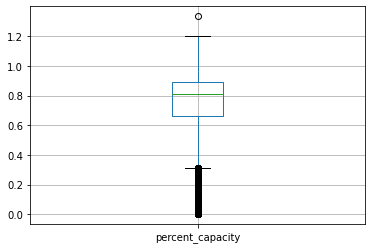

In [27]:
df_pass.boxplot('percent_capacity')

In [28]:
df_pass.percent_capacity.describe()

count    633801.000000
mean          0.738873
std           0.217693
min           0.002128
25%           0.660000
50%           0.811594
75%           0.892857
max           1.333333
Name: percent_capacity, dtype: float64

### ***Feature 2:*** keeping only aircraft_group not aircraft_config

In [29]:
df_pass= df_pass.drop(columns =['aircraft_config'])

### route column from origin to dest

In [30]:
df_pass['origin'] = df_pass['origin'] + '-' + df_pass['dest']

In [31]:
df_pass = df_pass.rename(columns ={'origin':'route'})

In [32]:
df_pass = df_pass.drop(columns =['dest'])

### ***Feature:*** percent payload of freight and mail - commented out code blocks - not creating this feature anymore


In [33]:
#df_pass['payload'] = (df_pass['freight']+df_pass['mail'])/df_pass['payload']

In [34]:
#df_pass = df_pass.rename(columns ={'payload':'percent_payload_fr'})

In [35]:
#df_pass.percent_payload_fr.value_counts()

In [36]:
#df_pass.percent_payload_fr.isnull().sum()

In [37]:
#df_pass.shape

In [38]:
#df_pass = df_pass.drop(columns =['mail','freight'])

### ***Feature 3:*** percent of payload that is passengers

In [39]:
df_pass['payload'] = (df_pass['passengers']*185.2)/df_pass['payload']

In [40]:
df_pass = df_pass.rename(columns ={'payload':'percent_pload_pass'})

In [41]:
df_pass = df_pass.drop(columns =['passengers'])

In [42]:
df_pass.percent_pload_pass.value_counts()

0.168364    1440
0.336727    1429
0.154333    1229
0.308667    1218
0.231500    1051
            ... 
0.578681       1
0.535939       1
0.607894       1
0.573043       1
0.665754       1
Name: percent_pload_pass, Length: 364250, dtype: int64

In [43]:
df_pass.percent_pload_pass.isnull().sum()

0

In [44]:
df_pass.percent_pload_pass.describe()

count    6.338010e+05
mean              inf
std               NaN
min      3.851112e-04
25%      4.640146e-01
50%      5.945745e-01
75%      6.766923e-01
max               inf
Name: percent_pload_pass, dtype: float64

In [45]:
# Replacing infinite with nan
df_pass.percent_pload_pass = df_pass.percent_pload_pass.replace(np.inf, np.nan, inplace=False)

# Dropping all the rows with nan values
df_pass.percent_pload_pass  = df_pass.percent_pload_pass.dropna()
  
# Printing df
df_pass.percent_pload_pass.describe()

count    633794.000000
mean          0.554847
std           0.189405
min           0.000385
25%           0.464011
50%           0.594575
75%           0.676690
max           1.949474
Name: percent_pload_pass, dtype: float64

<AxesSubplot:>

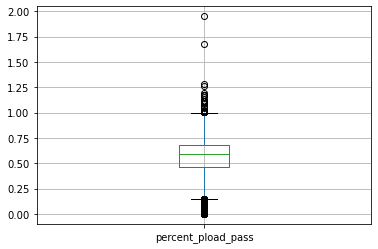

In [46]:
df_pass.boxplot('percent_pload_pass')

### ***Feature 4:*** accel_time

In [47]:
df_pass['ramp_to_ramp'] = df_pass['ramp_to_ramp'] - df_pass['air_time'] 

In [48]:
df_pass = df_pass.rename(columns ={'ramp_to_ramp':'accel_time'})

In [49]:
df_pass.accel_time.value_counts()

12.0       10981
4.0        10688
18.0        9837
24.0        7619
20.0        7418
           ...  
7418.0         1
8472.0         1
14655.0        1
9348.0         1
8190.0         1
Name: accel_time, Length: 7945, dtype: int64

In [50]:
df_pass.accel_time.isnull().sum()

0

In [51]:
df_pass = df_pass.drop(columns =['air_time'])

In [52]:
df_pass = df_pass.drop(df_pass['accel_time'].idxmax())

In [53]:
df_pass = df_pass.drop(df_pass['accel_time'].idxmax())

<AxesSubplot:>

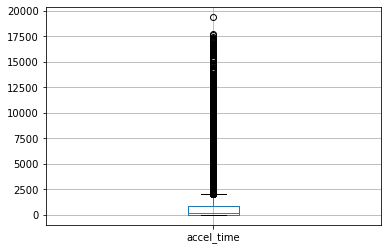

In [54]:
df_pass.boxplot('accel_time')

In [55]:
df_pass.accel_time.describe()

count    633799.000000
mean        650.936882
std        1018.461668
min           0.000000
25%          36.000000
50%         215.000000
75%         851.000000
max       19359.000000
Name: accel_time, dtype: float64

### year and month combine columns

In [56]:
df_pass['year'] = (df_pass['year']).map(str) + '-' + (df_pass['month']).map(str)
df_pass = df_pass.rename(columns ={'year':'date'})
df_pass = df_pass.drop(columns = ['month'])

In [57]:
df_pass['date'] = pd.to_datetime(df_pass['date'],format='%Y-%M').dt.date

In [58]:
df_pass['date']

0         2018-01-01
1         2018-01-01
2         2018-01-01
3         2018-01-01
4         2018-01-01
             ...    
633799    2019-01-01
633800    2019-01-01
633801    2019-01-01
633802    2019-01-01
633803    2019-01-01
Name: date, Length: 633799, dtype: object

### dataframe

In [59]:
df_pass = df_pass.reset_index()
df_pass = df_pass.drop(columns = ['index'])
df_pass

,percent_pload_pass,percent_capacity,distance,accel_time,unique_carrier,origin_airport_id,route,dest_airport_id,aircraft_group,date
0,0.549322,0.777778,86.0,5.0,KAH,10559,BFI-ESD,11588,4,2018-01-01
1,0.354563,0.500000,69.0,5.0,KAH,10844,BYW-LKE,13002,0,2018-01-01
2,0.354563,0.500000,69.0,5.0,KAH,13002,LKE-BYW,10844,0,2018-01-01
3,0.756948,0.900000,77.0,5.0,KAH,13002,LKE-RCE,14477,0,2018-01-01
4,0.311391,0.444444,84.0,5.0,KAH,14477,RCE-BFI,10559,4,2018-01-01
...,...,...,...,...,...,...,...,...,...,...
633794,0.484496,0.632979,239.0,9506.0,WN,11259,DAL-HOU,12191,6,2019-01-01
633795,0.459432,0.496146,17.0,2076.0,NEW,10613,BID-WST,15855,1,2019-01-01
633796,0.676297,0.730342,94.0,2184.0,9K,14843,SJU-STX,15027,1,2019-01-01
633797,0.540610,0.720613,163.0,9718.0,HA,12173,HNL-KOA,12758,6,2019-01-01


In [60]:
df_pass.to_csv('cleaned_passengers_data.csv')